In [ ]:
#@title Default title text
!pip install pingouin
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
import seaborn as sns
import math
import base64
import scipy.stats
from scipy.stats import chi2_contingency
import statsmodels.formula.api as sm
import pingouin

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=26ab87f8a586451527165740d82b15da44c0e0f65d7a0005ede7846b5c518ef8
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=40f677b6b2122dec54bab357451ec63677335f17bccc20ef2b2782588bf6cb9e
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Team 33 Capstone Project/05_2_Extended_Analysis_jan7.csv')
df.head()

,year,state,county,total pop,age 18+ perc,age 25-64,age 65+,median income,poverty 18+ perc,umemployed perc,low food access perc,low income low food acces perc,total snap,total medicaid,less high school perc,high school perc,some college perc,bachelor degree+,native american,asian,black,hispanic,white,cvd native american 35-64,cvd asian 35-64,cvd asian 65+,cvd black 35-64,cvd black 65+,cvd hispanic 35-64,cvd hispanic 65+,cvd white 35-64,cvd white 65+,cvd_total
0,2010,CA,Santa Clara,1739396,75.8,975276,186574,65253,7.37,5.7,84.4,29.0,90996.0,149619,13.515118,16.237067,24.702790,45.545025,4603,548883,41704,456367,636231,40.5,21.2,525.2,87.6,779.6,34.7,570.7,30.3,556.2,2646.0
1,2010,CA,Trinity,13701,81.0,7745,2483,43851,12.75,6.9,100.0,40.0,1338.0,1556,9.668695,28.194726,42.866802,19.269777,220,205,54,892,11482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.5,229.0,254.5
2,2010,FL,St. Johns,180624,76.7,97405,27196,62663,8.75,4.6,97.5,20.5,13326.0,15186,7.477639,22.503756,30.671088,39.347516,209,3798,9771,8797,155228,0.0,9.3,0.0,38.8,375.4,12.2,0.0,12.5,229.3,677.5
3,2010,FL,Washington,24125,77.9,13341,3593,36216,13.92,4.3,100.0,28.6,4411.0,2271,20.153017,40.671188,26.905466,12.270330,187,91,3306,728,19027,0.0,0.0,0.0,86.0,0.0,0.0,0.0,46.3,402.9,535.2
4,2010,GA,Clay,2981,73.6,1448,562,26250,22.37,26.0,100.0,100.0,1205.0,381,23.126873,42.657343,24.675325,9.540460,0,0,2275,3,689,0.0,0.0,0.0,84.9,0.0,0.0,0.0,0.0,0.0,84.9


#**Percent Change Over Time Across Variables**

In [ ]:
#This dataset was created to calculate the rates of change over time. It is very similar to the original dataset but has more columns for this reason
perc_change_df = pd.read_csv('/content/drive/MyDrive/Team 33 Capstone Project/Data/Extended Analysis Data/vanessa_dataset.csv').drop('Unnamed: 0', axis = 1)
perc_change_df.sample(5)

,FIPS/State/County,Year,State,County,Total Population,Median_income,Percent Low Access,Percent Low income and low access,"Poverty Estimate, All Ages","Poverty Percent, All Ages","Poverty Estimate, Ages 18+","Poverty Percent, Ages 18+",unemployment,Total Medicaid Enrollment,Hispanic or Latino,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more races,65 years and over,25 to 64 years,male,female,Total SNAP Enrollment,Less than a high school diploma,Percent of adults with less than a high school diploma,High school diploma only,Percent of adults with a high school diploma only,Some college or associate degree,Percent of adults completing some college or associate degree,Bachelor degree or higher,Percent of adults with a bachelor degree or higher,CVD: American Indian and Alaska Native 35-64,CVD: Asian and Pacific Islander 35-64,CVD: Asian and Pacific Islander 65+,CVD: Black 35-64,CVD: Black 65+,CVD: Hispanic 35-64,CVD: Hispanic 65+,CVD: White 35-64,CVD: White 65+,18 years & over,Percent 18+,income_change,Total Population_25+,total_pop_change,Percent 25-64,Percent 65+,Percent 25+,unemployment_change,snap_change,medicaid_change,poverty_change,Native American Alaska CVD,Asian Pacific Islander CVD,Black CVD,Hispanic CVD,White CVD,Deaths/100k,total_cvd_change
25,36061 NY New York,2010,NY,New York,1583345,64971,0.7,50.0,254740.0,16.6,201231.0,13.11,76606,160833,406972,756591,209206,1779,175252,296,6255,26994,207526,959234,47.01,52.99,NaN,175539.0,14.963533,151336.0,12.900388,169399.0,14.440139,676838.0,57.695940,26.7,20.0,452.7,160.9,1111.0,58.4,611.4,27.1,436.7,1341389,84.7,0.000000,1166760,0.000000,60.6,13.1,73.7,0.000000,NaN,0.000000,0.000000,26.7,472.7,1271.9,669.8,463.8,2904.9,0.000000
17,13117 GA Forsyth,2019,GA,Forsyth,228383,128476,88.9,2.5,11024.0,4.5,7694.0,3.14,3604,22825,21686,163760,7577,388,29494,37,466,4975,26669,121400,49.71,50.29,5665.0,10206.0,6.626885,23565.0,15.301054,35775.0,23.229162,84463.0,54.842899,NaN,NaN,NaN,0.0,0.0,17.8,NaN,36.2,301.5,164774,72.1,46.653730,148069,40.883920,53.2,11.7,64.8,-49.930536,-29.653545,165.561373,-2.335618,0.0,0.0,0.0,0.0,337.7,337.7,48.963388
16,13061 GA Clay,2019,GA,Clay,2951,37701,100.0,100.0,797.0,28.8,571.0,20.63,281,537,11,1045,1841,0,30,0,17,7,762,1435,48.36,51.64,985.0,369.0,17.075428,738.0,34.150856,689.0,31.883387,365.0,16.890329,NaN,NaN,NaN,111.7,0.0,NaN,NaN,NaN,NaN,2387,80.9,43.622857,2197,9.303483,48.6,25.8,74.4,-63.741935,-18.257261,40.944882,-17.841727,0.0,0.0,111.7,0.0,0.0,111.7,31.566549
34,48259 TX Kendall,2019,TX,Kendall,43769,130088,66.7,0.0,3468.0,7.4,2293.0,4.89,609,7746,10450,31664,214,52,392,55,0,942,8269,21641,49.09,50.91,1579.0,1853.0,5.946345,5983.0,19.199666,9221.0,29.590527,14105.0,45.263462,NaN,NaN,NaN,0.0,0.0,28.4,NaN,28.4,488.5,33413,76.3,62.819630,29910,37.719864,49.4,18.9,68.3,-40.701071,-16.099894,199.883856,5.863343,0.0,0.0,0.0,0.0,516.9,516.9,-22.896778
5,6105 CA Trinity,2019,CA,Trinity,12700,40846,40.0,100.0,1986.0,16.5,1467.0,12.19,259,2342,927,10427,127,698,210,28,51,232,3410,6437,51.46,48.54,1659.0,677.0,6.967888,3540.0,36.434747,3631.0,37.371346,1868.0,19.226019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,276.9,10534,82.9,-6.852751,9847,-3.725068,50.7,26.9,77.5,-72.621564,23.991031,50.514139,-15.104167,0.0,0.0,0.0,0.0,315.9,315.9,24.125737


In [ ]:
def high_low_income(value):
  if value > 60000:
    label = 'high income counties'
  else:
    label = 'low income counties'
  return label
perc_change_df['counties'] = perc_change_df['Median_income']
perc_change_df['counties'] = perc_change_df['counties'].apply(high_low_income)

##**Median Household Income Change**

In [ ]:
mean_income_change = perc_change_df.groupby(['Year', 'counties'])['income_change'].mean().to_frame().reset_index()

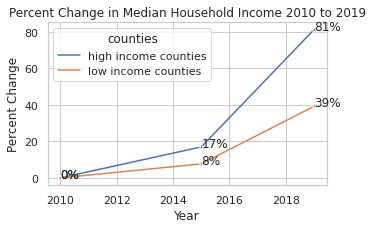

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(data = mean_income_change, x = 'Year', y = 'income_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_income_change['Year'], mean_income_change['income_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in Median Household Income 2010 to 2019')
plt.ticklabel_format(style='plain')

##**Change in 25-64 and 65+ Population**

In [ ]:
#df['Total Population_25+'] = df['25 to 64 years'] + df['65 years and over']
perc_change_df['pop_25_to_64_change'] = perc_change_df.groupby(['County'])['25 to 64 years'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
perc_change_df['pop_65plus_change'] = perc_change_df.groupby(['County'])['65 years and over'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))

In [ ]:
mean_pop_25to64_change = perc_change_df.groupby(['Year', 'counties'])['pop_25_to_64_change'].mean().to_frame().reset_index()
mean_pop_65plus_change = perc_change_df.groupby(['Year', 'counties'])['pop_65plus_change'].mean().to_frame().reset_index()

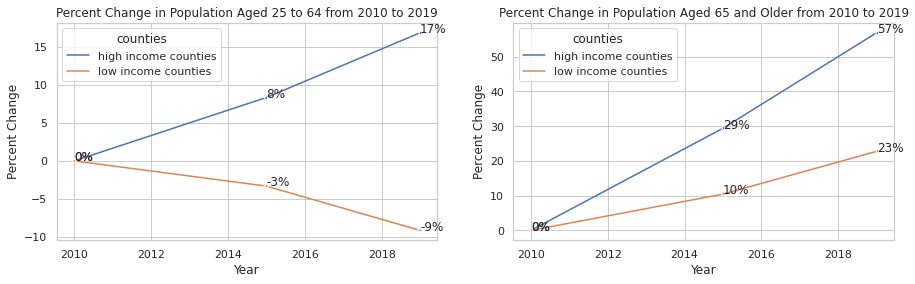

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(data = mean_pop_25to64_change, x = 'Year', y = 'pop_25_to_64_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_pop_25to64_change['Year'], mean_pop_25to64_change['pop_25_to_64_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in Population Aged 25 to 64 from 2010 to 2019')
plt.ticklabel_format(style='plain')
plt.subplot(1,2,2)
sns.lineplot(data = mean_pop_65plus_change, x = 'Year', y = 'pop_65plus_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_pop_65plus_change['Year'], mean_pop_65plus_change['pop_65plus_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in Population Aged 65 and Older from 2010 to 2019')
plt.ticklabel_format(style='plain')

##**Change in Number of Unemployed Individuals**

In [ ]:
mean_unemployment_change = perc_change_df.groupby(['Year', 'counties'])['unemployment_change'].mean().to_frame().reset_index()

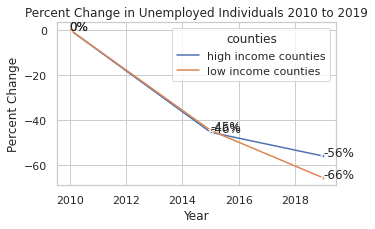

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(data = mean_unemployment_change, x = 'Year', y = 'unemployment_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_unemployment_change['Year'], mean_unemployment_change['unemployment_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in Unemployed Individuals 2010 to 2019')
plt.ticklabel_format(style='plain')

###**Change in Medicaid Enrollment**

In [ ]:
mean_medicaid_change = perc_change_df.groupby(['Year', 'counties'])['medicaid_change'].mean().to_frame().reset_index()

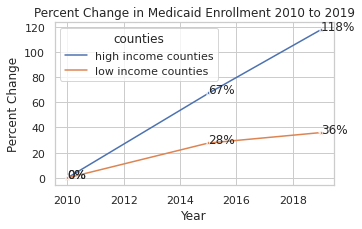

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(data = mean_medicaid_change, x = 'Year', y = 'medicaid_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_unemployment_change['Year'], mean_medicaid_change['medicaid_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in Medicaid Enrollment 2010 to 2019')
plt.ticklabel_format(style='plain')

###**Change in Individuals Living in Poverty**

In [ ]:
mean_poverty_change = perc_change_df.groupby(['Year', 'counties'])['poverty_change'].mean().to_frame().reset_index()

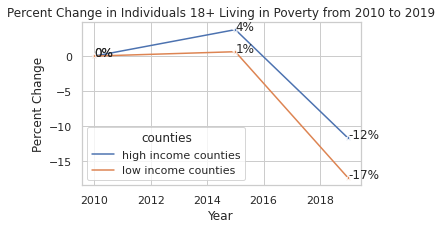

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(data = mean_poverty_change, x = 'Year', y = 'poverty_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_unemployment_change['Year'], mean_poverty_change['poverty_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in Individuals 18+ Living in Poverty from 2010 to 2019')
plt.ticklabel_format(style='plain')

###**Change in CVD Mortality Rates**

In [ ]:
mean_cvd_change = perc_change_df.groupby(['Year', 'counties'])['total_cvd_change'].mean().to_frame().reset_index()

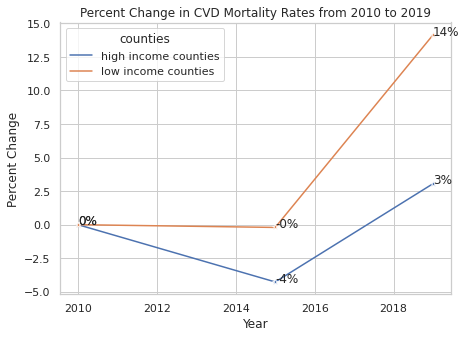

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data = mean_cvd_change, x = 'Year', y = 'total_cvd_change', hue = 'counties', legend = 'full', marker = '*')
for x, y in zip(mean_cvd_change['Year'], mean_cvd_change['total_cvd_change']):
    plt.text(x = x, y = y, s = '{:.0f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change in CVD Mortality Rates from 2010 to 2019')
plt.ticklabel_format(style='plain')

## **Change in Food Access**

In [ ]:
def high_low_income(value):
  if value > 60000:
    label = 'high income county'
  else:
    label = 'low income county'
  return label
dfa = df.copy()
dfa['counties'] = dfa['median income']
dfa['counties'] = dfa['counties'].apply(high_low_income)
dfa = dfa.rename(columns = {'low income low food acces perc':'low income low food access perc'})
dfa = dfa.sort_values(by = ['state','counties','year'], ascending = True)
dfa

In [ ]:
corr_dfa = dfa.corr()
corr_dfa['low food access perc'].sort_values(ascending = False)

In [ ]:
corr_dfa['low income low food access perc'].sort_values(ascending = False)

In [ ]:
#@title Default title text
observe = dfa[['year','state','county','total pop', 'median income','low food access perc', 'low income low food access perc','cvd_total' ,'counties']].copy()
observe['cvd_total change'] = observe.groupby(['state','county'])['cvd_total'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100)).fillna(0)
observe['median income change']= observe.groupby(['state','county'])['median income'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100)).fillna(0)
observe['total pop change']= observe.groupby(['state','county'])['total pop'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100)).fillna(0)

observe

,year,state,county,total pop,median income,low food access perc,low income low food access perc,cvd_total,counties,cvd_total change,median income change,total pop change
0,2010,CA,Santa Clara,1739396,65253,84.4,29.0,2646.0,high income county,0.000000,0.000000,0.000000
12,2015,CA,Santa Clara,1868149,102191,75.3,26.4,2813.1,high income county,6.315193,56.607359,7.402167
24,2019,CA,Santa Clara,1927470,124055,75.3,25.4,2858.9,high income county,8.046107,90.113864,10.812604
1,2010,CA,Trinity,13701,43851,100.0,40.0,254.5,low income county,0.000000,0.000000,0.000000
13,2015,CA,Trinity,13373,37669,40.0,100.0,269.8,low income county,6.011788,-14.097740,-2.393986
25,2019,CA,Trinity,12700,40846,40.0,100.0,315.9,low income county,24.125737,-6.852751,-7.306036
2,2010,FL,St. Johns,180624,62663,97.5,20.5,677.5,high income county,0.000000,0.000000,0.000000
14,2015,FL,St. Johns,210495,71896,75.0,20.0,710.1,high income county,4.811808,14.734373,16.537669
26,2019,FL,St. Johns,244674,113475,74.4,20.7,725.3,high income county,7.055351,81.087723,35.460404
3,2010,FL,Washington,24125,36216,100.0,28.6,535.2,low income county,0.000000,0.000000,0.000000


In [ ]:
observe_lic = observe[observe['counties']=='low income county']
observe_lic

,year,state,county,total pop,median income,low food access perc,low income low food access perc,cvd_total,counties,cvd_total change,median income change,total pop change
1,2010,CA,Trinity,13701,43851,100.0,40.0,254.5,low income county,0.000000,0.000000,0.000000
13,2015,CA,Trinity,13373,37669,40.0,100.0,269.8,low income county,6.011788,-14.097740,-2.393986
25,2019,CA,Trinity,12700,40846,40.0,100.0,315.9,low income county,24.125737,-6.852751,-7.306036
3,2010,FL,Washington,24125,36216,100.0,28.6,535.2,low income county,0.000000,0.000000,0.000000
15,2015,FL,Washington,24629,47885,57.1,75.0,618.7,low income county,15.601644,32.220565,2.089119
27,2019,FL,Washington,24764,48972,57.1,100.0,809.7,low income county,51.289238,35.222001,2.648705
4,2010,GA,Clay,2981,26250,100.0,100.0,84.9,low income county,0.000000,0.000000,0.000000
16,2015,GA,Clay,3104,43577,100.0,100.0,89.0,low income county,4.829211,66.007619,4.126132
28,2019,GA,Clay,2951,37701,100.0,100.0,111.7,low income county,31.566549,43.622857,-1.006374
6,2010,IL,Alexander,8449,28833,75.0,100.0,507.1,low income county,0.000000,0.000000,0.000000


In [ ]:
observe_lic.corr()

,year,total pop,median income,low food access perc,low income low food access perc,cvd_total,cvd_total change,median income change,total pop change
year,1.000000,0.008873,0.610120,-0.334992,0.296302,0.036568,0.293122,0.610260,-0.326371
total pop,0.008873,1.000000,0.224475,-0.756017,-0.772167,0.987746,0.055927,0.095413,0.356665
median income,0.610120,0.224475,1.000000,-0.265920,-0.259355,0.292442,0.309858,0.698426,0.041489
low food access perc,-0.334992,-0.756017,-0.265920,1.000000,0.417076,-0.779226,-0.071054,0.018001,-0.061747
low income low food access perc,0.296302,-0.772167,-0.259355,0.417076,1.000000,-0.780707,-0.008679,0.062522,-0.406429
cvd_total,0.036568,0.987746,0.292442,-0.779226,-0.780707,1.000000,0.106759,0.114240,0.368649
cvd_total change,0.293122,0.055927,0.309858,-0.071054,-0.008679,0.106759,1.000000,0.047066,0.637472
median income change,0.610260,0.095413,0.698426,0.018001,0.062522,0.114240,0.047066,1.000000,-0.121944
total pop change,-0.326371,0.356665,0.041489,-0.061747,-0.406429,0.368649,0.637472,-0.121944,1.000000


In [ ]:
observe_hic = observe[observe['counties']=='high income county']
observe_hic

,year,state,county,total pop,median income,low food access perc,low income low food access perc,cvd_total,counties,cvd_total change,median income change,total pop change
0,2010,CA,Santa Clara,1739396,65253,84.4,29.0,2646.0,high income county,0.000000,0.000000,0.000000
12,2015,CA,Santa Clara,1868149,102191,75.3,26.4,2813.1,high income county,6.315193,56.607359,7.402167
24,2019,CA,Santa Clara,1927470,124055,75.3,25.4,2858.9,high income county,8.046107,90.113864,10.812604
2,2010,FL,St. Johns,180624,62663,97.5,20.5,677.5,high income county,0.000000,0.000000,0.000000
14,2015,FL,St. Johns,210495,71896,75.0,20.0,710.1,high income county,4.811808,14.734373,16.537669
26,2019,FL,St. Johns,244674,113475,74.4,20.7,725.3,high income county,7.055351,81.087723,35.460404
5,2010,GA,Forsyth,163885,128476,100.0,6.7,240.0,high income county,0.000000,0.000000,0.000000
17,2015,GA,Forsyth,196236,97886,88.9,7.5,199.1,high income county,-17.041667,-23.809894,19.740062
29,2019,GA,Forsyth,228383,128476,88.9,2.5,355.5,high income county,48.125000,0.000000,39.355646
7,2010,IL,Lake,697179,78948,96.7,19.6,1312.6,high income county,0.000000,0.000000,0.000000


In [ ]:
observe_hic.corr()

,year,total pop,median income,low food access perc,low income low food access perc,cvd_total,cvd_total change,median income change,total pop change
year,1.000000,0.036713,0.705266,-0.183177,-0.285712,-0.012033,0.081487,0.675324,0.632052
total pop,0.036713,1.000000,0.017429,-0.515884,0.318648,0.976121,0.016271,0.396521,-0.429976
median income,0.705266,0.017429,1.000000,-0.048391,-0.491796,-0.070909,0.057168,0.710800,0.366467
low food access perc,-0.183177,-0.515884,-0.048391,1.000000,-0.105898,-0.619738,0.120282,-0.357827,0.078461
low income low food access perc,-0.285712,0.318648,-0.491796,-0.105898,1.000000,0.354562,0.015003,-0.162884,-0.249859
cvd_total,-0.012033,0.976121,-0.070909,-0.619738,0.354562,1.000000,-0.016891,0.397536,-0.441315
cvd_total change,0.081487,0.016271,0.057168,0.120282,0.015003,-0.016891,1.000000,-0.106942,0.323329
median income change,0.675324,0.396521,0.710800,-0.357827,-0.162884,0.397536,-0.106942,1.000000,0.142882
total pop change,0.632052,-0.429976,0.366467,0.078461,-0.249859,-0.441315,0.323329,0.142882,1.000000


### low food access

In [ ]:
#determine the average percent change across state by high and low income counties
mean_lowaccess = (dfa.groupby(['year','counties'])['low food access perc'].mean()).to_frame().reset_index()
mean_lowaccess = mean_lowaccess.sort_values(by= ['year','counties'], ascending = True)
mean_lowaccess

,year,counties,low food access perc
0,2010,high income county,79.883333
1,2010,low income county,80.550000
2,2015,high income county,63.166667
3,2015,low income county,50.150000
4,2019,high income county,65.633333
5,2019,low income county,54.383333


Text(0.5, 1.0, 'Low income counties on average see more food access over time')

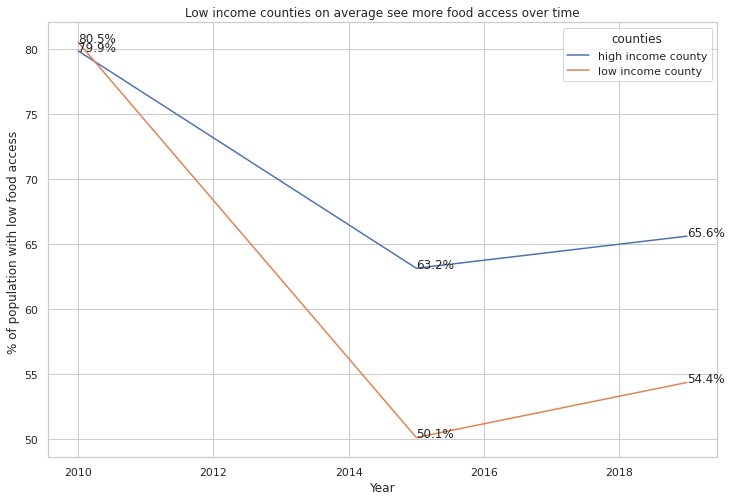

In [ ]:
#lets plot these findings
plt.rcParams["figure.figsize"] = (12,8)
sns.lineplot( data = mean_lowaccess, x = 'year', y = 'low food access perc', hue = 'counties')
for x, y in zip(mean_lowaccess['year'], mean_lowaccess['low food access perc']):
  plt.text( x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of population with low food access ')
plt.title('Low income counties on average see more food access over time')

#### low food access by state

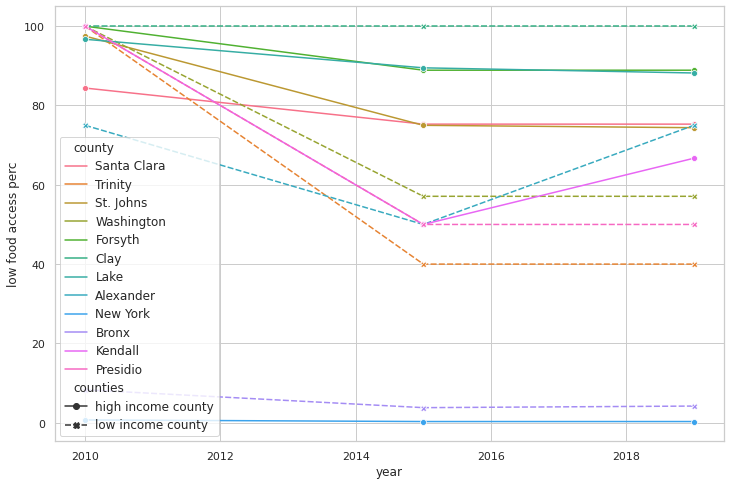

In [ ]:
sns.color_palette('hls',12)
sns.lineplot(data = dfa,x = 'year',y ='low food access perc', hue = 'county', style = 'counties', markers = True)

Text(0.5, 1.0, 'Low income county(Trinity) in California sees higher growth in food access')

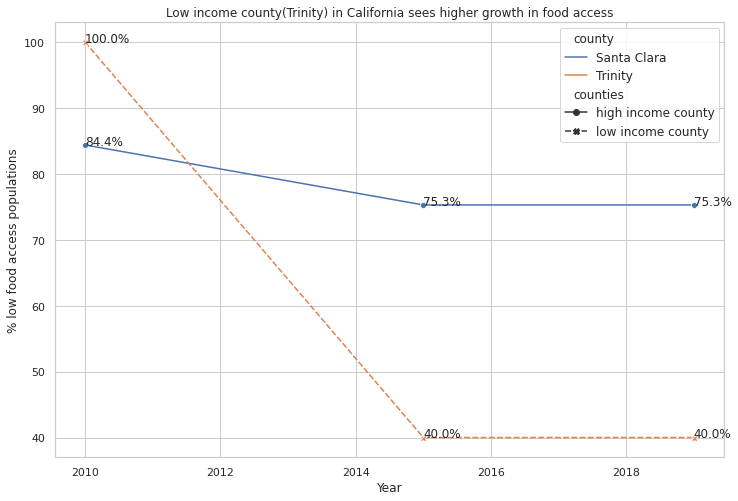

In [ ]:
sns.lineplot(data = dfa.query("state=='CA'"),x = 'year',y ='low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='CA'")['year'], dfa.query("state=='CA'")['low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% low food access populations')
plt.title('Low income county(Trinity) in California sees higher growth in food access')

Text(0.5, 1.0, 'Low income county(Washington) in Florida has increase in food access')

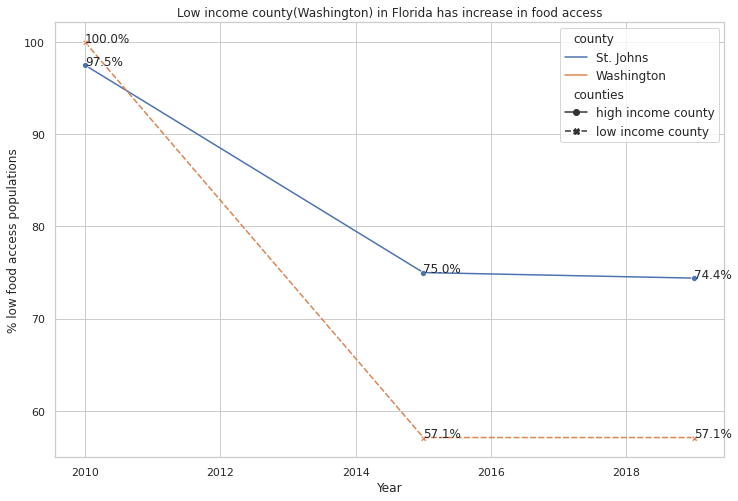

In [ ]:
sns.lineplot(data = dfa.query("state=='FL'"),x = 'year',y ='low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='FL'")['year'], dfa.query("state=='FL'")['low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% low food access populations')
plt.title('Low income county(Washington) in Florida has increase in food access')

Text(0.5, 1.0, 'Low income county(Clay) shows no change regarding food access in almost a decade')

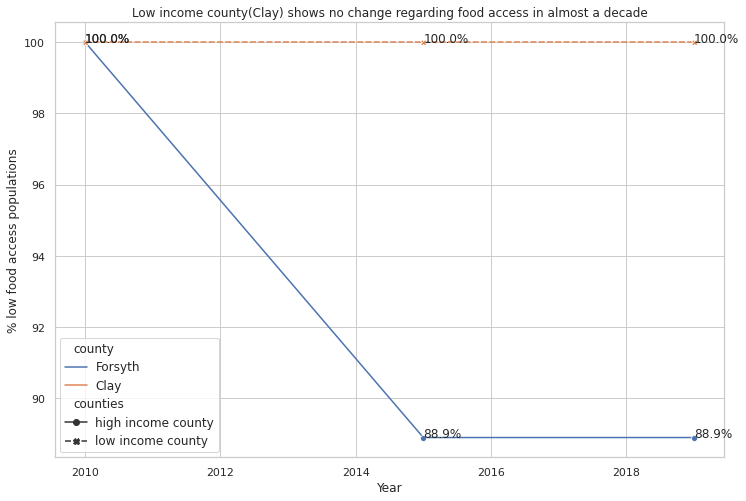

In [ ]:
sns.lineplot(data = dfa.query("state=='GA'"),x = 'year',y ='low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='GA'")['year'], dfa.query("state=='GA'")['low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% low food access populations')
plt.title('Low income county(Clay) shows no change regarding food access in almost a decade')

Text(0.5, 1.0, 'Illinois high income county(Lake) shows rise in food access')

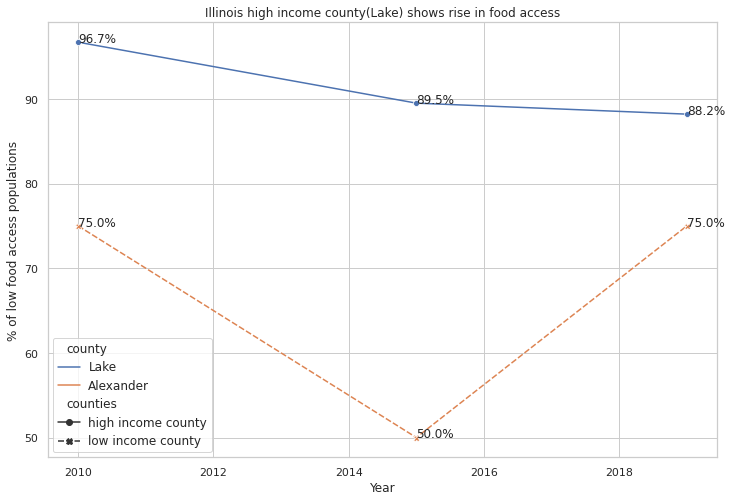

In [ ]:
sns.lineplot(data = dfa.query("state=='IL'"),x = 'year',y ='low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='IL'")['year'], dfa.query("state=='IL'")['low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low food access populations')
plt.title('Illinois high income county(Lake) shows rise in food access')

Text(0.5, 1.0, 'Both counties see a similar rise in food access')

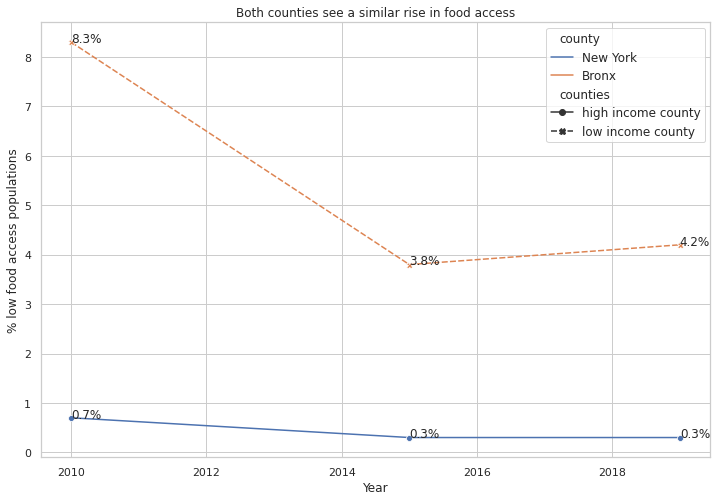

In [ ]:
sns.lineplot(data = dfa.query("state=='NY'"),x = 'year',y ='low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='NY'")['year'], dfa.query("state=='NY'")['low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% low food access populations')
plt.title('Both counties see a similar rise in food access')

Text(0.5, 1.0, 'Food access rises in both counties, with low income county(Presidio) seeing a greater change')

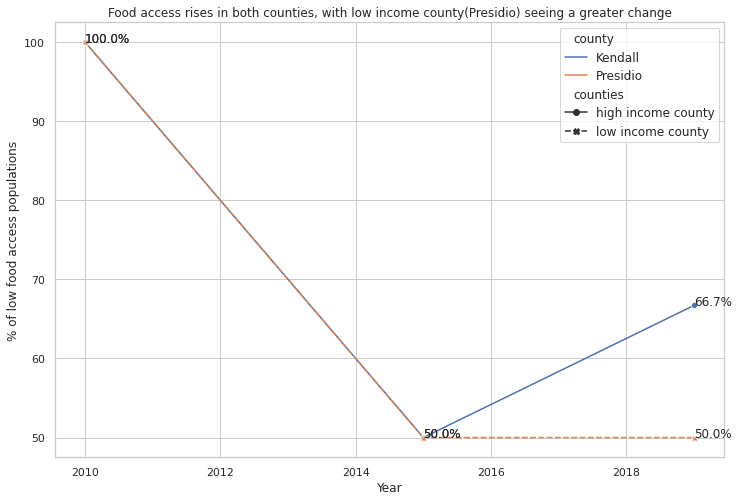

In [ ]:
sns.lineplot(data = dfa.query("state=='TX'"),x = 'year',y ='low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='TX'")['year'], dfa.query("state=='TX'")['low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low food access populations')
plt.title('Food access rises in both counties, with low income county(Presidio) seeing a greater change')

### low income and low food access

In [ ]:
#lets determine the average percent change for low access, low income populations in all six states over time
mean_lowincome_lowaccess = dfa.groupby(['year','counties'])['low income low food access perc'].mean().to_frame().reset_index()
mean_lowincome_lowaccess = mean_lowincome_lowaccess.sort_values(by= ['year','counties'], ascending = True).replace(np.inf, 0)
mean_lowincome_lowaccess

,year,counties,low income low food access perc
0,2010,high income county,20.966667
1,2010,low income county,63.816667
2,2015,high income county,18.183333
3,2015,low income county,84.300000
4,2019,high income county,11.333333
5,2019,low income county,86.900000


Text(0.5, 1.0, 'Low income counties see great rise while high income counties decline')

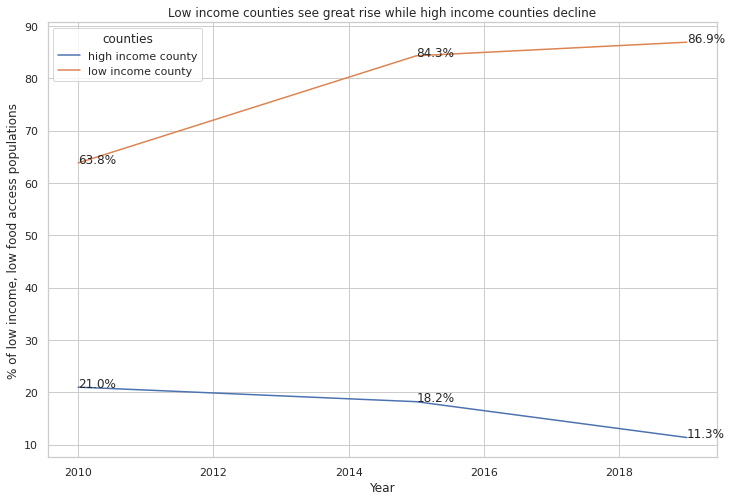

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
sns.lineplot( data = mean_lowincome_lowaccess, x = 'year', y = 'low income low food access perc', hue = 'counties')
for x, y in zip(mean_lowincome_lowaccess['year'],mean_lowincome_lowaccess['low income low food access perc']):
  plt.text( x=x, y=y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('Low income counties see great rise while high income counties decline')

#### change in low income, low food access by state

Text(0.5, 1.0, 'Despite rise in food access, Trinity sees a drastic increase in low access, low income populations')

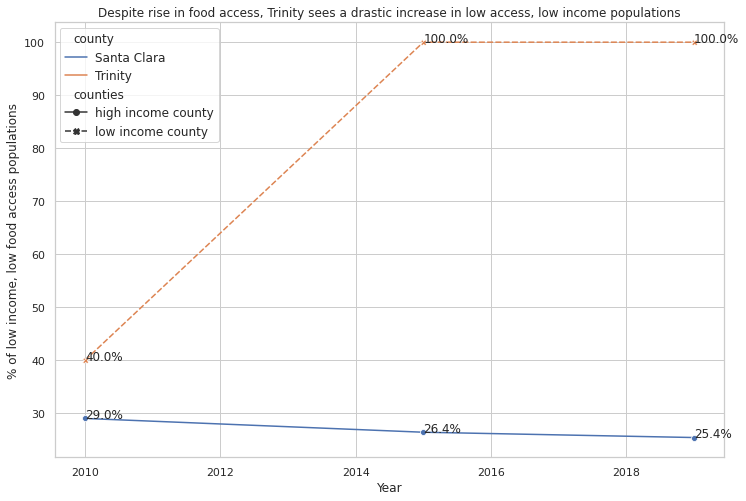

In [ ]:
sns.lineplot(data = dfa.query("state=='CA'"),x = 'year',y ='low income low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='CA'")['year'], dfa.query("state=='CA'")['low income low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('Despite rise in food access, Trinity sees a drastic increase in low access, low income populations')

Text(0.5, 1.0, 'Florida low income county (Washington) low access, low income population sees steady growth over a decade')

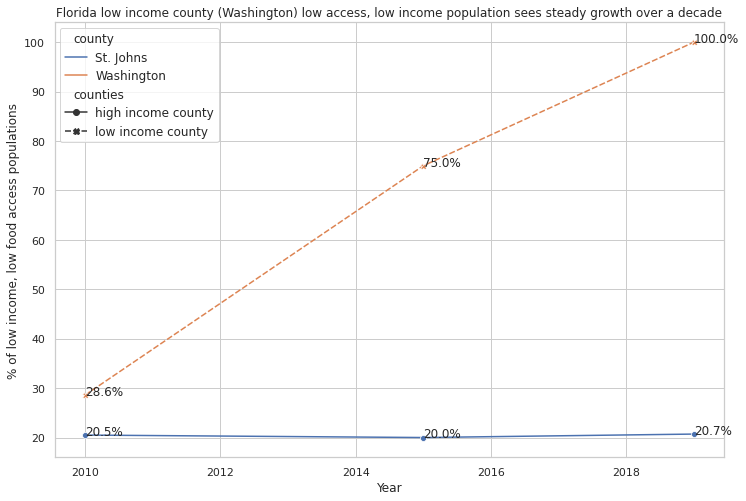

In [ ]:
sns.lineplot(data = dfa.query("state=='FL'"),x = 'year',y ='low income low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='FL'")['year'], dfa.query("state=='FL'")['low income low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('Florida low income county (Washington) low access, low income population sees steady growth over a decade')

Text(0.5, 1.0, 'Forsyth has a sharp drop in its low access, low income population over a decade')

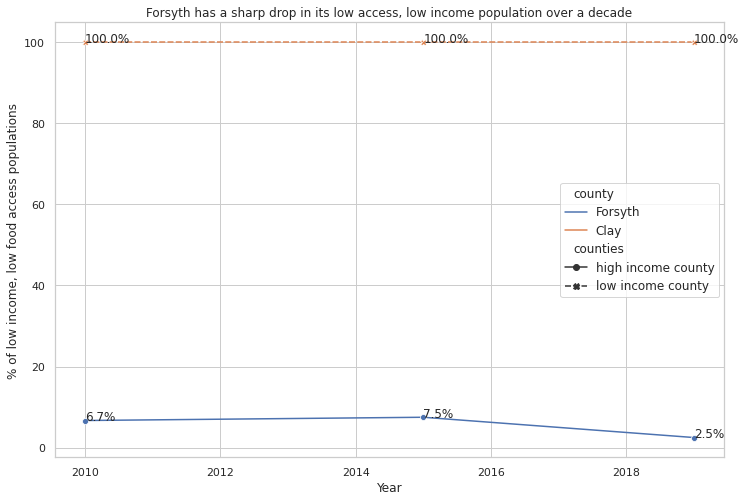

In [ ]:
sns.lineplot(data = dfa.query("state=='GA'"),x = 'year',y ='low income low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='GA'")['year'], dfa.query("state=='GA'")['low income low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('Forsyth has a sharp drop in its low access, low income population over a decade')

Text(0.5, 1.0, 'Both counties see little to n change in low income population that have low food access')

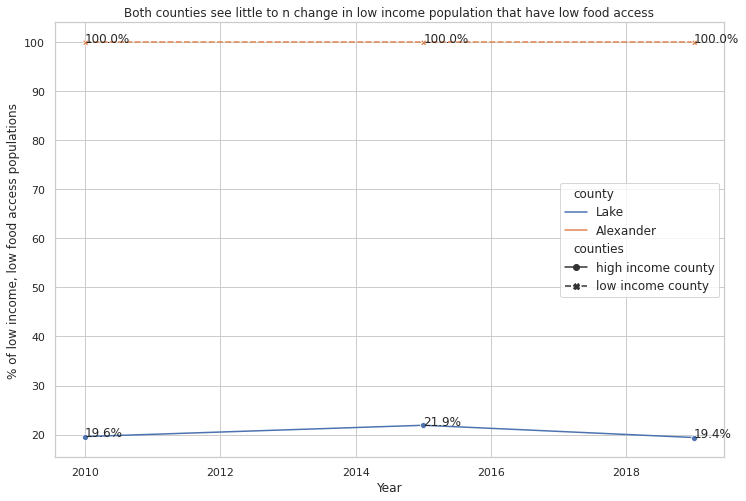

In [ ]:
sns.lineplot(data = dfa.query("state=='IL'"),x = 'year',y ='low income low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='IL'")['year'], dfa.query("state=='IL'")['low income low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('Both counties see little to n change in low income population that have low food access')

Text(0.5, 1.0, 'Low income, low food access population rises in the Bronx, while New York City drops to zero ')

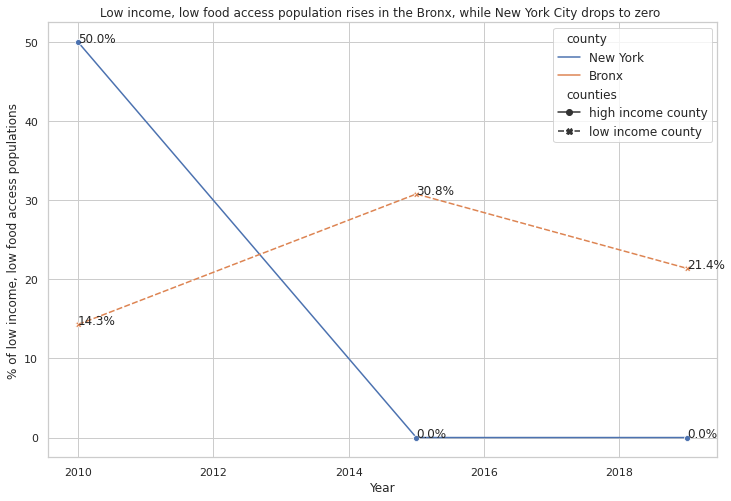

In [ ]:
sns.lineplot(data = dfa.query("state=='NY'"),x = 'year',y ='low income low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='NY'")['year'], dfa.query("state=='NY'")['low income low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('Low income, low food access population rises in the Bronx, while New York City drops to zero ')

Text(0.5, 1.0, 'There is no change over time in low income, low access population for either county')

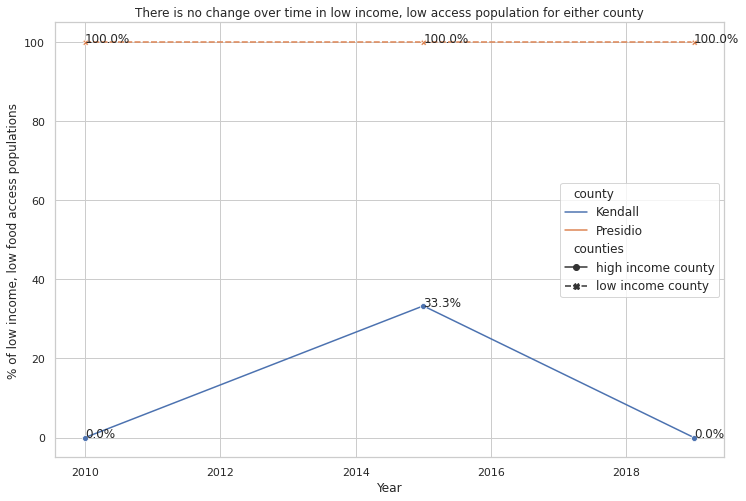

In [ ]:
sns.lineplot(data = dfa.query("state=='TX'"),x = 'year',y ='low income low food access perc', hue = 'county', style='counties', markers = True)
for x, y in zip(dfa.query("state=='TX'")['year'], dfa.query("state=='TX'")['low income low food access perc']):
    plt.text(x = x, y = y, s = '{:.1f}%'.format(y))
plt.xlabel('Year')
plt.ylabel('% of low income, low food access populations')
plt.title('There is no change over time in low income, low access population for either county')

##**Medicaid vs. Total Death Rates**

In [ ]:
perc_change_df['medicaid_rate'] = (perc_change_df['Total Medicaid Enrollment'] * perc_change_df['Percent 18+'])/100
medicaid_cvd = perc_change_df[['FIPS/State/County', 'Year','medicaid_rate', 'Deaths/100k', 'counties']]

In [ ]:
medicaid_cvd.corr()

,Year,medicaid_rate,Deaths/100k
Year,1.000000,0.124889,0.012475
medicaid_rate,0.124889,1.000000,0.934182
Deaths/100k,0.012475,0.934182,1.000000


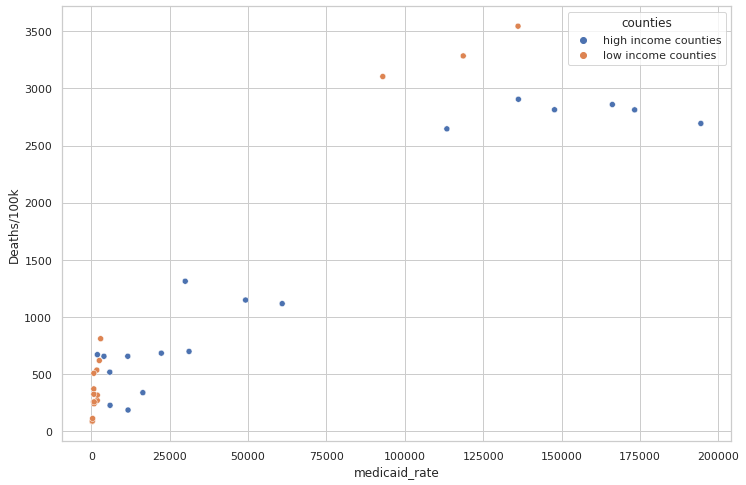

In [ ]:
sns.scatterplot(data = medicaid_cvd, x = "medicaid_rate", y = "Deaths/100k", hue = 'counties')

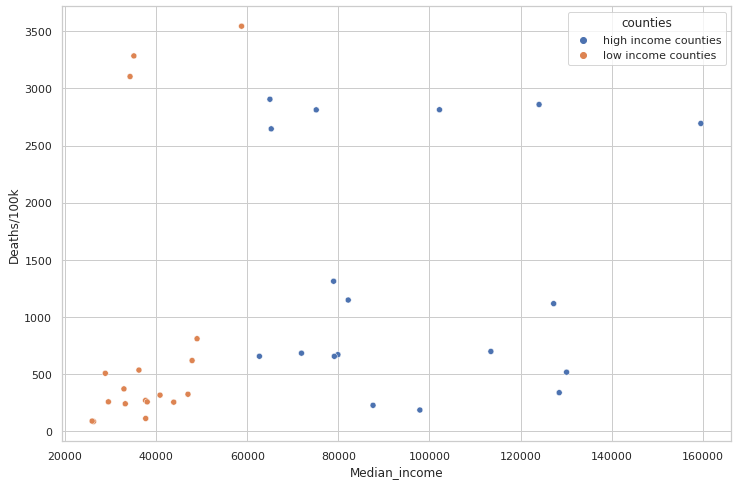

In [ ]:
sns.scatterplot(data = perc_change_df, x = "Median_income", y = "Deaths/100k", hue = 'counties')

#Bi-variate Analysis of Education against Death rate

2010


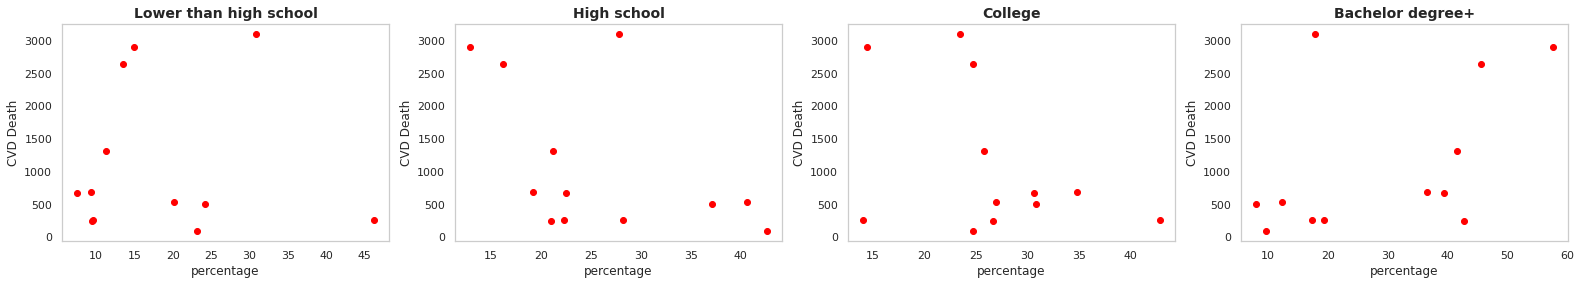

In [ ]:
#Filter the dataframe to have only the variable needed for this visualization. For simplicity, visualize each year at a time
df_for_analysis = df[["year", "state", "county", "less high school perc","high school perc","some college perc","bachelor degree+","cvd_total"]]

def education_death_rate_plot(df_for_analysis, year):
  df_for_analysis_2010 = df_for_analysis[df_for_analysis["year"]== year]

  fig, (ax1, ax2,ax3, ax4) = plt.subplots(1, 4, figsize = (27,4));


  #Making a dicationary of the plots so that I can make the four plots at once
  ax_dict = {
      ax1:["Lower than high school", "less high school perc"],
      ax2:["High school", "high school perc"],
      ax3:["College", "some college perc"],
      ax4:["Bachelor degree+", "bachelor degree+"]

  }

  for ax in (ax1, ax2, ax3, ax4):
    ax.scatter(y = df_for_analysis_2010["cvd_total"], x = df_for_analysis_2010[ax_dict[ax][1]], color = "red")
    ax.set_title(ax_dict[ax][0], fontdict={'fontweight':'bold', 'fontsize':14})
    ax.set_xlabel("percentage")
    ax.set_ylabel("CVD Death")
  for ax in (ax1, ax2, ax3,ax4):
    ax.grid(False)

print("2010")
education_death_rate_plot(df_for_analysis, 2010)


2015


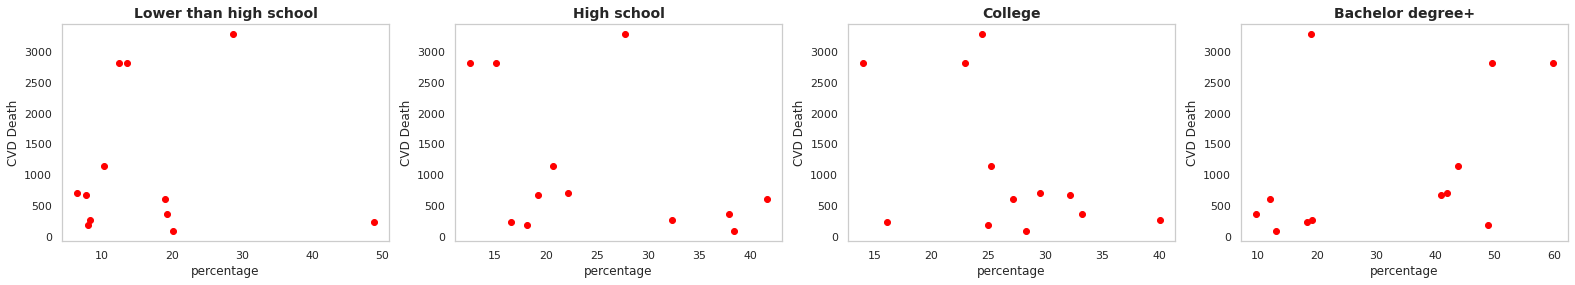

In [ ]:
print("2015")
education_death_rate_plot(df_for_analysis, 2015)

2019


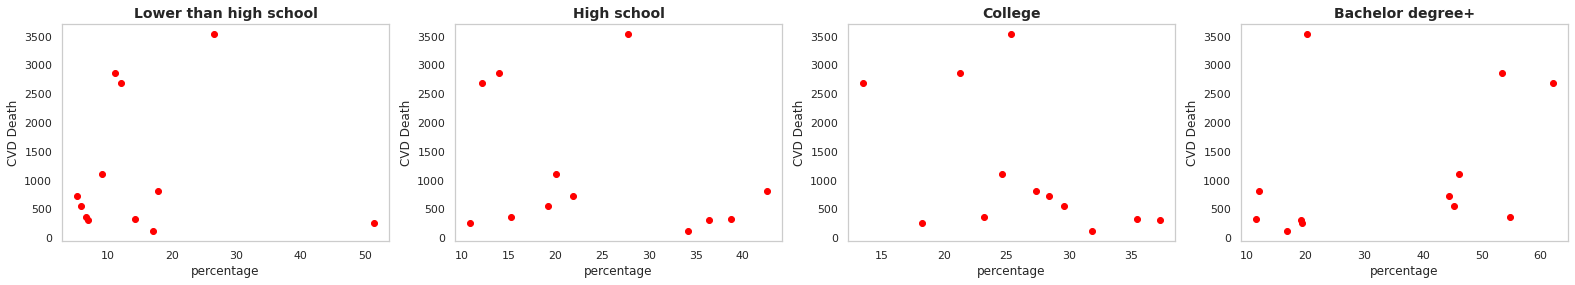

In [ ]:
print("2019")
education_death_rate_plot(df_for_analysis, 2019)

The Scatter plot above shows that there is no correlation between the level of education and the death as a result of cardiovascular dieseases. This observation is consistent for all the 3 years in consideration

**Estimating the correlation between the level of education and cardiovascular deaths.**


In [ ]:
#@title Default title text
df_for_analysis_2010 = df_for_analysis[df_for_analysis["year"]== 2010]

less_than_school_corr = df_for_analysis_2010["cvd_total"].corr(df_for_analysis_2010["less high school perc"])
high_school_corr = df_for_analysis_2010["cvd_total"].corr(df_for_analysis_2010["high school perc"])
some_college_corr = df_for_analysis_2010["cvd_total"].corr(df_for_analysis_2010["some college perc"])
bachelor_plus_corr = df_for_analysis_2010["cvd_total"].corr(df_for_analysis_2010["bachelor degree+"])


df_for_analysis_2015 = df_for_analysis[df_for_analysis["year"]== 2015]

less_than_school_corr_2015 = df_for_analysis_2015["cvd_total"].corr(df_for_analysis_2015["less high school perc"])
high_school_corr_2015 = df_for_analysis_2015["cvd_total"].corr(df_for_analysis_2015["high school perc"])
some_college_corr_2015 = df_for_analysis_2015["cvd_total"].corr(df_for_analysis_2015["some college perc"])
bachelor_plus_corr_2015 = df_for_analysis_2015["cvd_total"].corr(df_for_analysis_2015["bachelor degree+"])


df_for_analysis_2019 = df_for_analysis[df_for_analysis["year"]== 2019]

less_than_school_corr_2019 = df_for_analysis_2019["cvd_total"].corr(df_for_analysis_2019["less high school perc"])
high_school_corr_2019 = df_for_analysis_2019["cvd_total"].corr(df_for_analysis_2019["high school perc"])
some_college_corr_2019 = df_for_analysis_2019["cvd_total"].corr(df_for_analysis_2019["some college perc"])
bachelor_plus_corr_2019 = df_for_analysis_2019["cvd_total"].corr(df_for_analysis_2019["bachelor degree+"])


corr_dict = {
    "year": [2010,2015,2019],
    "Lower_than_high_school_corr_coeff": [less_than_school_corr, less_than_school_corr_2015, less_than_school_corr_2019],
    "High_school_corr_coeff":[high_school_corr, high_school_corr_2015, high_school_corr_2019],
    "Some_college_corr_coeff":[some_college_corr, some_college_corr_2015, some_college_corr_2019],
    "Bachelor_degree+_corr_coef":[bachelor_plus_corr, bachelor_plus_corr_2015, bachelor_plus_corr_2019]
}



corr_df = pd.DataFrame(corr_dict)
corr_df


,year,Lower_than_high_school_corr_coeff,High_school_corr_coeff,Some_college_corr_coeff,Bachelor_degree+_corr_coef
0,2010,0.002065,-0.490596,-0.412139,0.475206
1,2015,0.010572,-0.406677,-0.475846,0.416451
2,2019,0.029946,-0.295722,-0.517474,0.344839


The correlation analysis above shows that there is no strong correlation between education level and cardiovascular deaths.

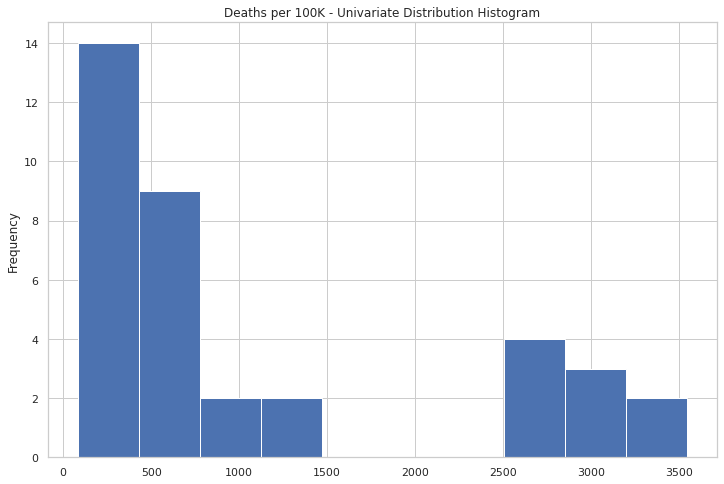

In [ ]:
df['cvd_total'].plot(kind = 'hist', xlabel = 'Deaths', title = 'Deaths per 100K - Univariate Distribution Histogram')
plt.show()

Exploring variations of Total Death rates per year

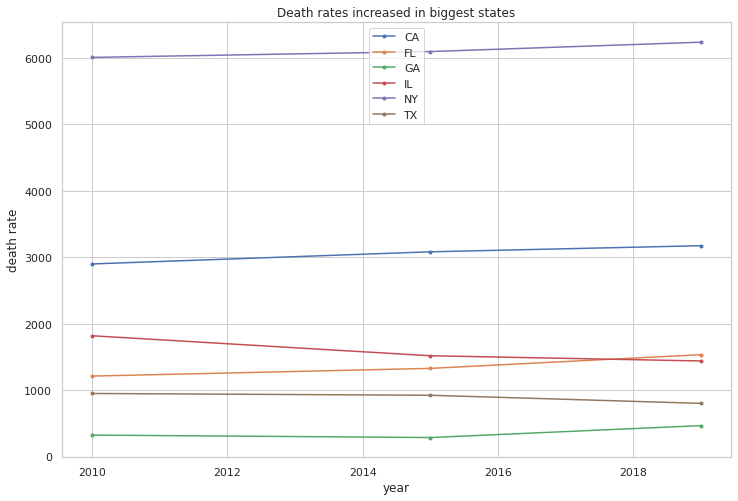

In [ ]:
df.groupby(['year', 'state'])['cvd_total'].sum().unstack().plot(kind='line', ylabel='death rate', title='Death rates increased in biggest states', style='.-').legend(loc='best')
plt.show()

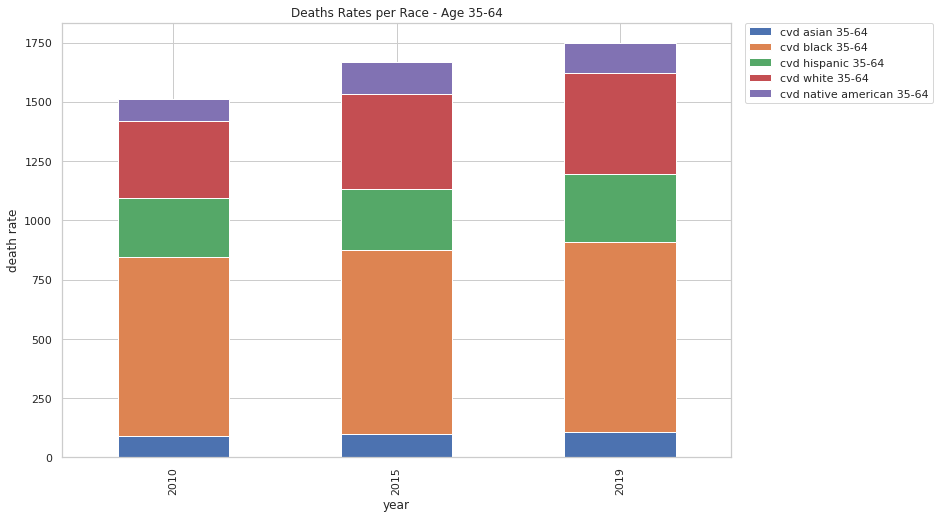

In [ ]:
df3564 = df[['year', 'cvd asian 35-64', 'cvd black 35-64', 'cvd hispanic 35-64', 'cvd white 35-64','cvd native american 35-64']]
df3564.groupby('year').sum().plot(kind='bar', stacked=True, ylabel='death rate', title='Deaths Rates per Race - Age 35-64').legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

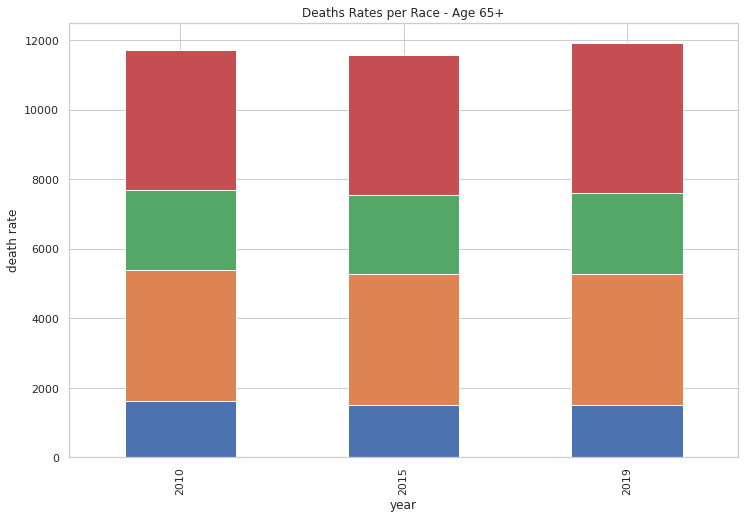

In [ ]:
df65 = df[['year', 'cvd asian 65+', 'cvd black 65+', 'cvd hispanic 65+', 'cvd white 65+']]
df65.groupby('year').sum().plot(kind='bar', stacked=True, ylabel='death rate', title='Deaths Rates per Race - Age 65+').legend().remove()
plt.show()

We checked to see if a relationship exists between median housing income and our target variable, cvd_total across the states under review.The charts revealed that ther is a  weak positive correlation(0.21) between median income and the total of cardiovascular disease death as shown in the charts below.

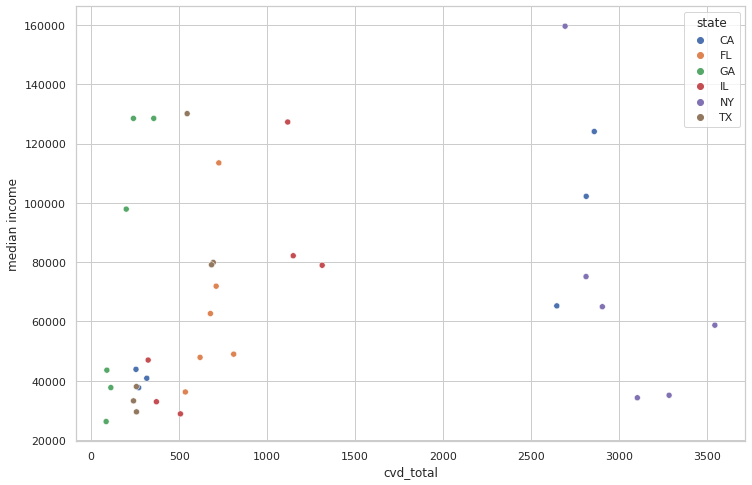

In [ ]:
sns.scatterplot(data=df,x="cvd_total",y="median income",hue="state")

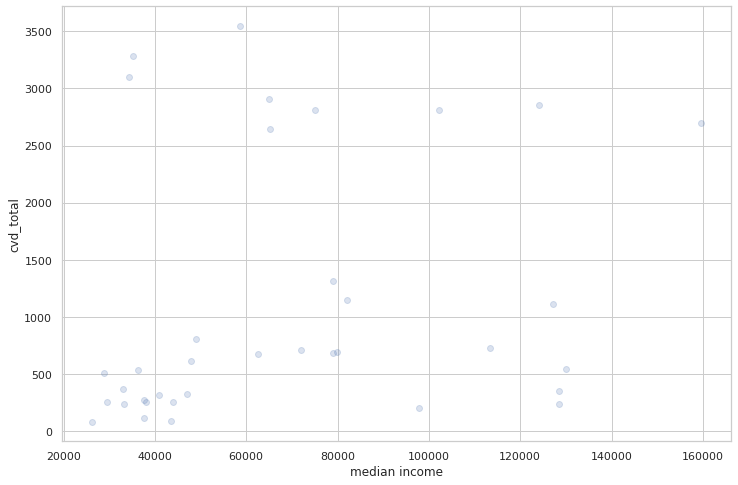

In [ ]:
sns.regplot(x="median income",y="cvd_total",data=df,fit_reg=False,scatter_kws={"alpha":0.2})

In [ ]:
df['median income'].corr(df['cvd_total'])

0.21535899870868552

We also checked to see if a relationship exists between unemployment and our target variable, across the states under review.The charts revealed that there is a  weak negative correlation(-0.21) between median income and the total of cardiovascular disease death as shown in the charts below.

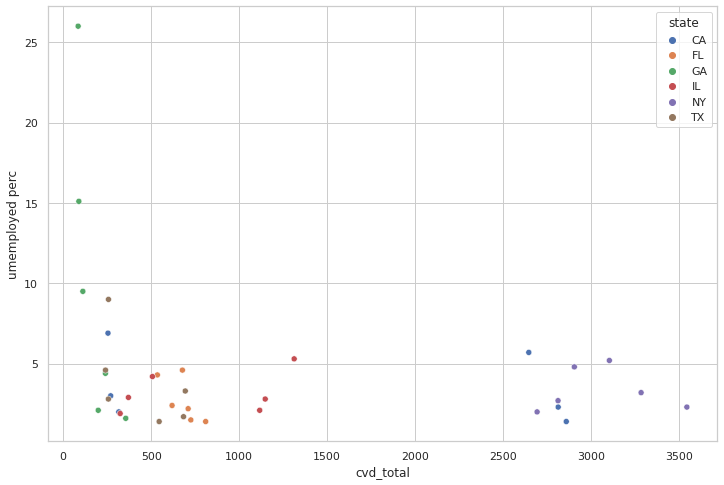

In [ ]:
sns.scatterplot(data=df,x="cvd_total",y="umemployed perc",hue="state")

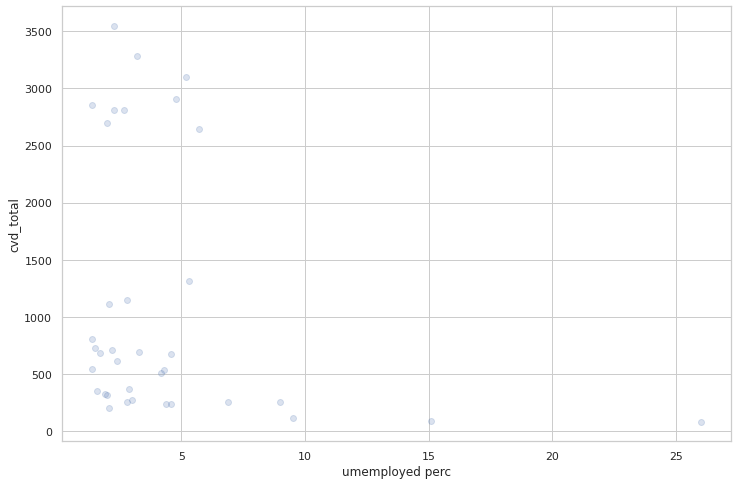

In [ ]:
sns.regplot(x='umemployed perc',y='cvd_total',data=df,fit_reg=False,scatter_kws={'alpha':0.2})

Based on the Heatmap output we observed that for the black that were over 65 years, there is  weak positive correlation(0.28) between median income and cardiovascuar death.We can infer that this may because they work harder to make higher income at the detriment of their cardiovascular health. This is also similar for the native american indians(0.24) that are between the ages of 35-64.
We also observed that a strong negative correlation(0.47) exists between unemployment rate and cardiovascular death among the white that are 65 years and above.


In [ ]:
df['median income'].corr(df['cvd black 65+'])

0.2770400819123874

In [ ]:
df['umemployed perc'].corr(df['cvd white 65+'])

-0.46707473951974326

Line plot of cardiovascular death from the year 2010 to 2019 across the six states under review shows that the state of Illinois an Texas have slight reduction in cardiovascular death rate while the remaining 4 states have slight increase in cardiovascular over the year in review.

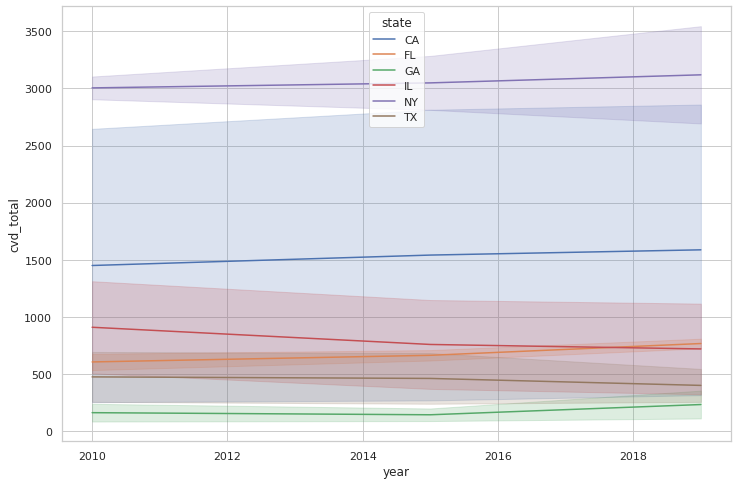

In [ ]:
sns.lineplot(data=df,x='year',y='cvd_total',hue='state')

As shown below, our analysis shows that there was increase in Median income with drastic reduction in unemployment over the years in all the states.Overall,starting 2014, there was a slight increase in cardiovascular death tat occured in all the six states  

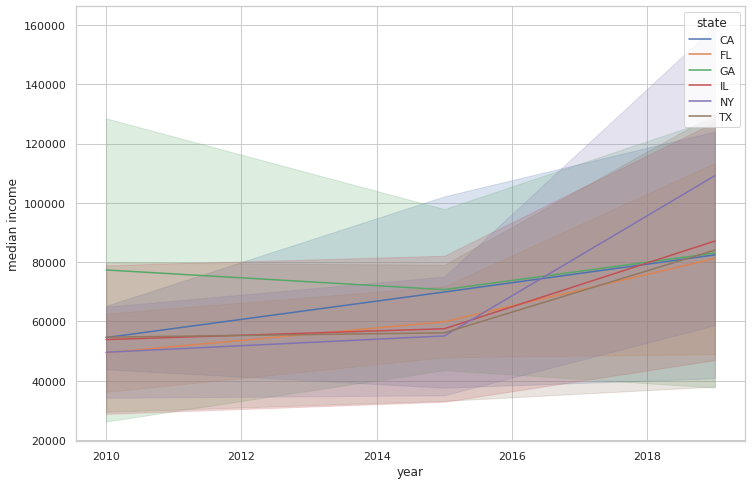

In [ ]:
sns.lineplot(data=df,x='year',y='median income',hue='state')

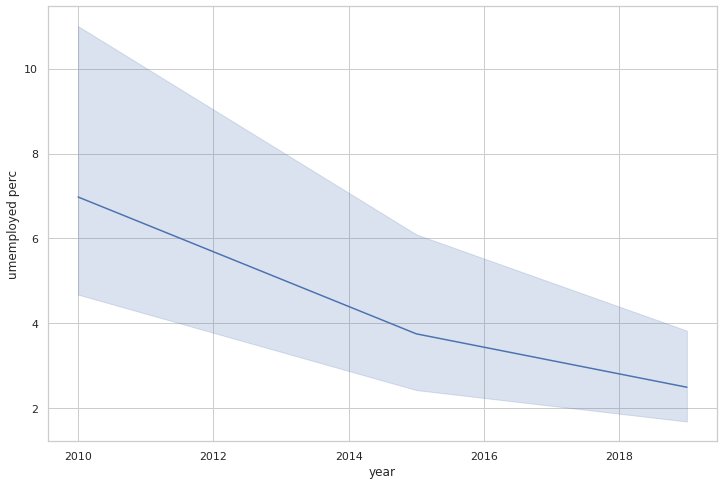

In [ ]:
sns.lineplot(data=df,x='year',y='umemployed perc')

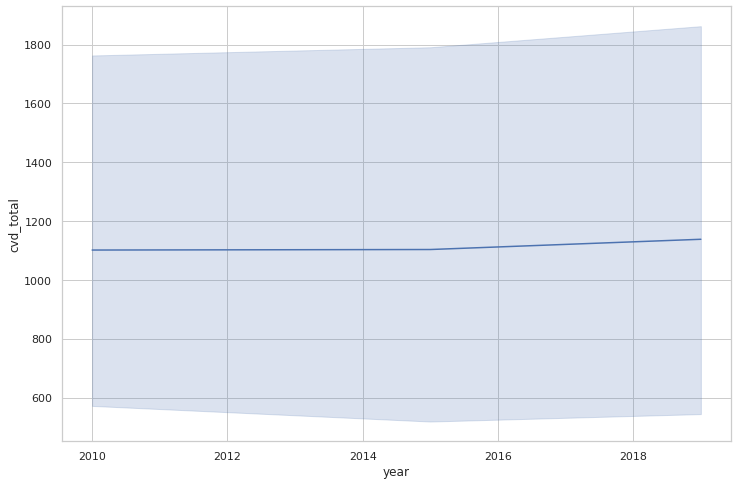

In [ ]:
sns.lineplot(data=df,x='year',y='cvd_total')

Explore positive correlations between target variable and variables of interest using .corr() function.

In [ ]:
df_var = df[['state', 'county', 'median income', 'poverty 18+ perc', 'umemployed perc', 'low food access perc',
             'low income low food acces perc', 'total medicaid', 'less high school perc', 'high school perc',
             'some college perc', 'bachelor degree+',  'native american', 'asian', 'black', 'hispanic', 'white', 'cvd_total']]
corrm = df_var.corr()
pos_corr = corrm['cvd_total'] > 0
corrm['cvd_total'][pos_corr].sort_values(ascending=False).to_frame().head(10)

,cvd_total
cvd_total,1.000000
hispanic,0.964572
total medicaid,0.948657
native american,0.915722
black,0.822022
white,0.716704
asian,0.626428
bachelor degree+,0.407036
median income,0.215359
less high school perc,0.013555


Exploring Negative correlations between variables of interest vs Death rates

In [ ]:
df_var = df[['state', 'county', 'median income', 'poverty 18+ perc', 'umemployed perc', 'low food access perc',
             'low income low food acces perc', 'total medicaid', 'less high school perc', 'high school perc',
             'some college perc', 'bachelor degree+',  'native american', 'asian', 'black', 'hispanic', 'white', 'cvd_total']]
corrm = df_var.corr()
neg_corr = corrm['cvd_total'] < 0
corrm['cvd_total'][neg_corr].sort_values(ascending=True).to_frame().head(10)

,cvd_total
low food access perc,-0.645232
low income low food acces perc,-0.466887
some college perc,-0.465548
high school perc,-0.390486
umemployed perc,-0.242129


Exploring positive correlations between variables of interest against white, black and hispanic people 65+

In [ ]:
df_var_black = df[['state', 'county', 'median income', 'poverty 18+ perc', 'umemployed perc', 'low food access perc',
             'low income low food acces perc', 'total medicaid', 'less high school perc', 'high school perc',
             'some college perc', 'bachelor degree+', 'cvd black 65+']]
corrm_black = df_var_black.corr()
pos_corr_black = corrm_black['cvd black 65+'] > 0
corrm_black['cvd black 65+'][pos_corr_black].sort_values(ascending=False).to_frame().head(10)

,cvd black 65+
cvd black 65+,1.000000
total medicaid,0.955181
bachelor degree+,0.518419
median income,0.277040


In [ ]:
df_var_white = df[['state', 'county', 'median income', 'poverty 18+ perc', 'umemployed perc', 'low food access perc',
             'low income low food acces perc', 'total medicaid', 'less high school perc', 'high school perc',
             'some college perc', 'bachelor degree+', 'cvd white 65+']]
corrm_white = df_var_white.corr()
pos_corr_white = corrm_white['cvd white 65+'] > 0
corrm_white['cvd white 65+'][pos_corr_white].sort_values(ascending=False).to_frame().head(10)

,cvd white 65+
cvd white 65+,1.000000
total medicaid,0.575667
bachelor degree+,0.218302
median income,0.203491
some college perc,0.000738


In [ ]:
df_var_hisp = df[['state', 'county', 'median income', 'poverty 18+ perc', 'umemployed perc', 'low food access perc',
             'low income low food acces perc', 'total medicaid', 'less high school perc', 'high school perc',
             'some college perc', 'bachelor degree+', 'cvd hispanic 65+']]
corrm_hisp = df_var_hisp.corr()
pos_corr_hisp = corrm_hisp['cvd hispanic 65+'] > 0
corrm_hisp['cvd hispanic 65+'][pos_corr_hisp].sort_values(ascending=False).to_frame().head(10)

,cvd hispanic 65+
cvd hispanic 65+,1.000000
total medicaid,0.924899
bachelor degree+,0.337741
less high school perc,0.254073
median income,0.127787
poverty 18+ perc,0.077284


In [ ]:
#df.rename(columns={'total medicaid':'total_medicaid'}, inplace=True)
df1 = df.rename(columns = {'total medicaid':'total_medicaid', 'median income': 'median_income','bachelor degree+':'bachelor_degree'})
formula1 = 'cvd_total ~ hispanic + total_medicaid + median_income + bachelor_degree'
model1 = sm.ols(formula = formula1, data = df1)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:              cvd_total   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.47e-23
Time:                        04:30:56   Log-Likelihood:                -239.90
No. Observations:                  36   AIC:                             489.8
Df Residuals:                      31   BIC:                             497.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         353.2590     87.382     

In [ ]:
df2 = df.rename(columns={'bachelor degree+':'bachelor_degree'})
formula2 = 'cvd_total ~ hispanic + black +total_medicaid + bachelor_degree'
model2 = sm.ols(formula = formula2, data = df2)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:              cvd_total   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     231.2
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.33e-22
Time:                        02:06:17   Log-Likelihood:                -241.86
No. Observations:                  36   AIC:                             493.7
Df Residuals:                      31   BIC:                             501.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         307.0771     88.689     

In [ ]:
df3 = df.rename(columns={'bachelor degree+':'bachelor_degree'})
formula3 = 'cvd_total ~ hispanic + black + white + total_medicaid + bachelor_degree'
model3 = sm.ols(formula = formula3, data = df3)
fitted3 = model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:              cvd_total   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.21e-22
Time:                        02:06:28   Log-Likelihood:                -239.11
No. Observations:                  36   AIC:                             490.2
Df Residuals:                      30   BIC:                             499.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         361.8403     87.063     